In [1]:
import numpy as np
import pandas as pd
import sys
import json
import os
import copy
import matplotlib.pyplot as plt
import scipy
import multiprocessing
import h5py
import corner
import dynesty

Load save:

In [2]:
dsampler = dynesty.NestedSampler.restore('dynesty_saves/2004_10_07_restricted_heights.save')
results = dsampler.results
samples = results.samples
ndim = len(samples.T)

Summary:

In [3]:
results.summary()

Summary
niter: 20567
ncall: 663752
eff(%):  2.840
logz: -118.378 +/-  0.236


In [4]:
samples[-1]

array([2.28543025e+06, 7.21359550e+00, 1.55820296e+01, 9.75839538e+01,
       2.71055562e-06, 3.37954753e-06, 8.23786050e-07, 1.28052526e-01,
       1.36335108e-02, 1.62175090e-02, 6.94783513e+00, 8.11180381e-01,
       8.04571804e-01, 5.31991423e+04, 4.42100346e+04, 4.00332503e+04])

In [13]:
print(dsampler.cite)

Code and Methods:
Speagle (2020): ui.adsabs.harvard.edu/abs/2020MNRAS.493.3132S
Koposov et al. (2023): doi.org/10.5281/zenodo.3348367

Nested Sampling:
Skilling (2004): ui.adsabs.harvard.edu/abs/2004AIPC..735..395S
Skilling (2006): projecteuclid.org/euclid.ba/1340370944
Dynamic Nested Sampling:
Higson et al. (2019): doi.org/10.1007/s11222-018-9844-0

Bounding Method:
Feroz, Hobson & Bridges (2009): ui.adsabs.harvard.edu/abs/2009MNRAS.398.1601F

Sampling Method:
Skilling (2006): projecteuclid.org/euclid.ba/1340370944



Samples:

Text(0, 0.5, 'mass')

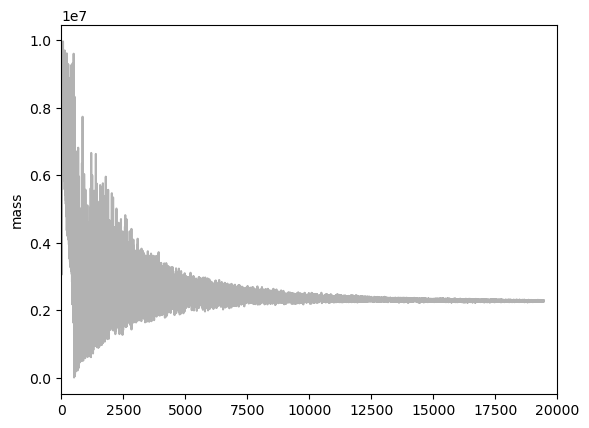

In [5]:
plt.plot(samples[:, 0], 'k', alpha=0.3)
plt.xlim(0, 20000)
plt.ylabel('mass')

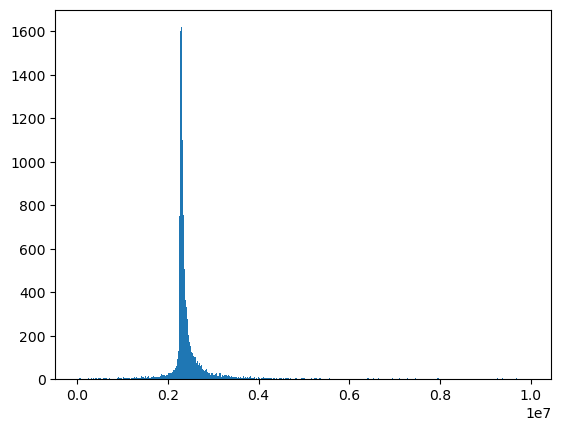

In [6]:
plt.hist(samples[:, 0].flatten(), bins='auto')
plt.show()

dyplots:

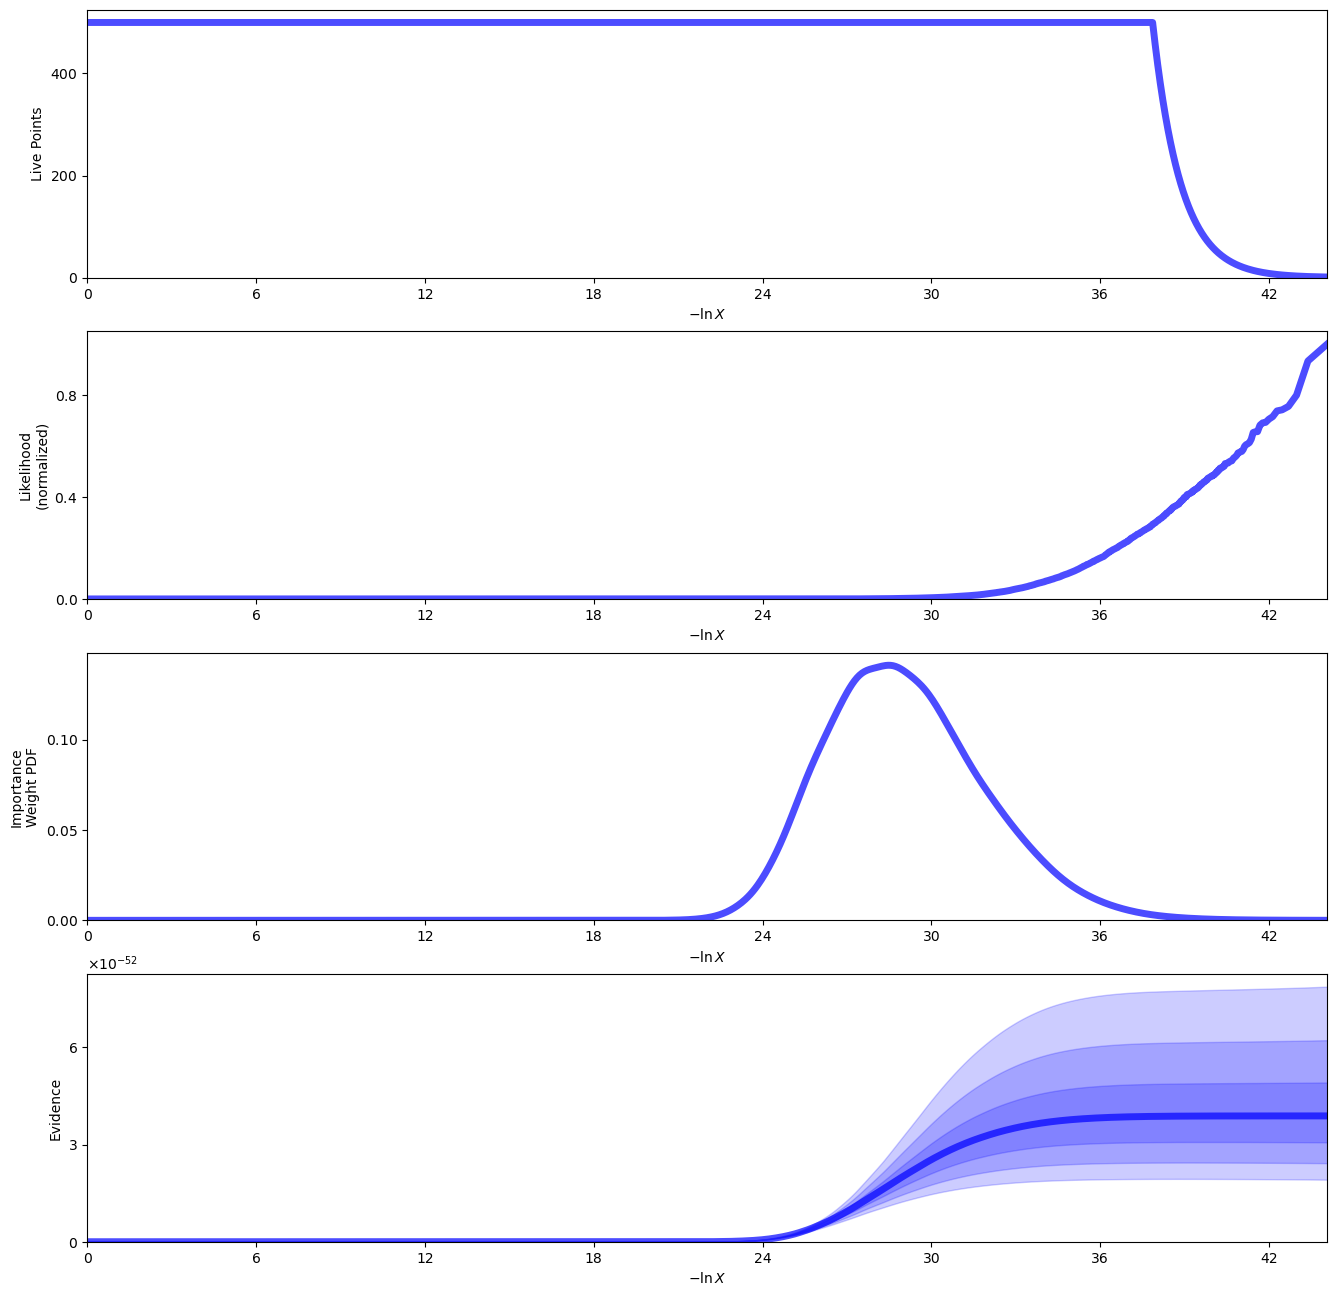

In [7]:
from dynesty import plotting as dyplot
fig, axes = dyplot.runplot(results)#, lnz_truth=lnz_truth)  # summary (run) plot

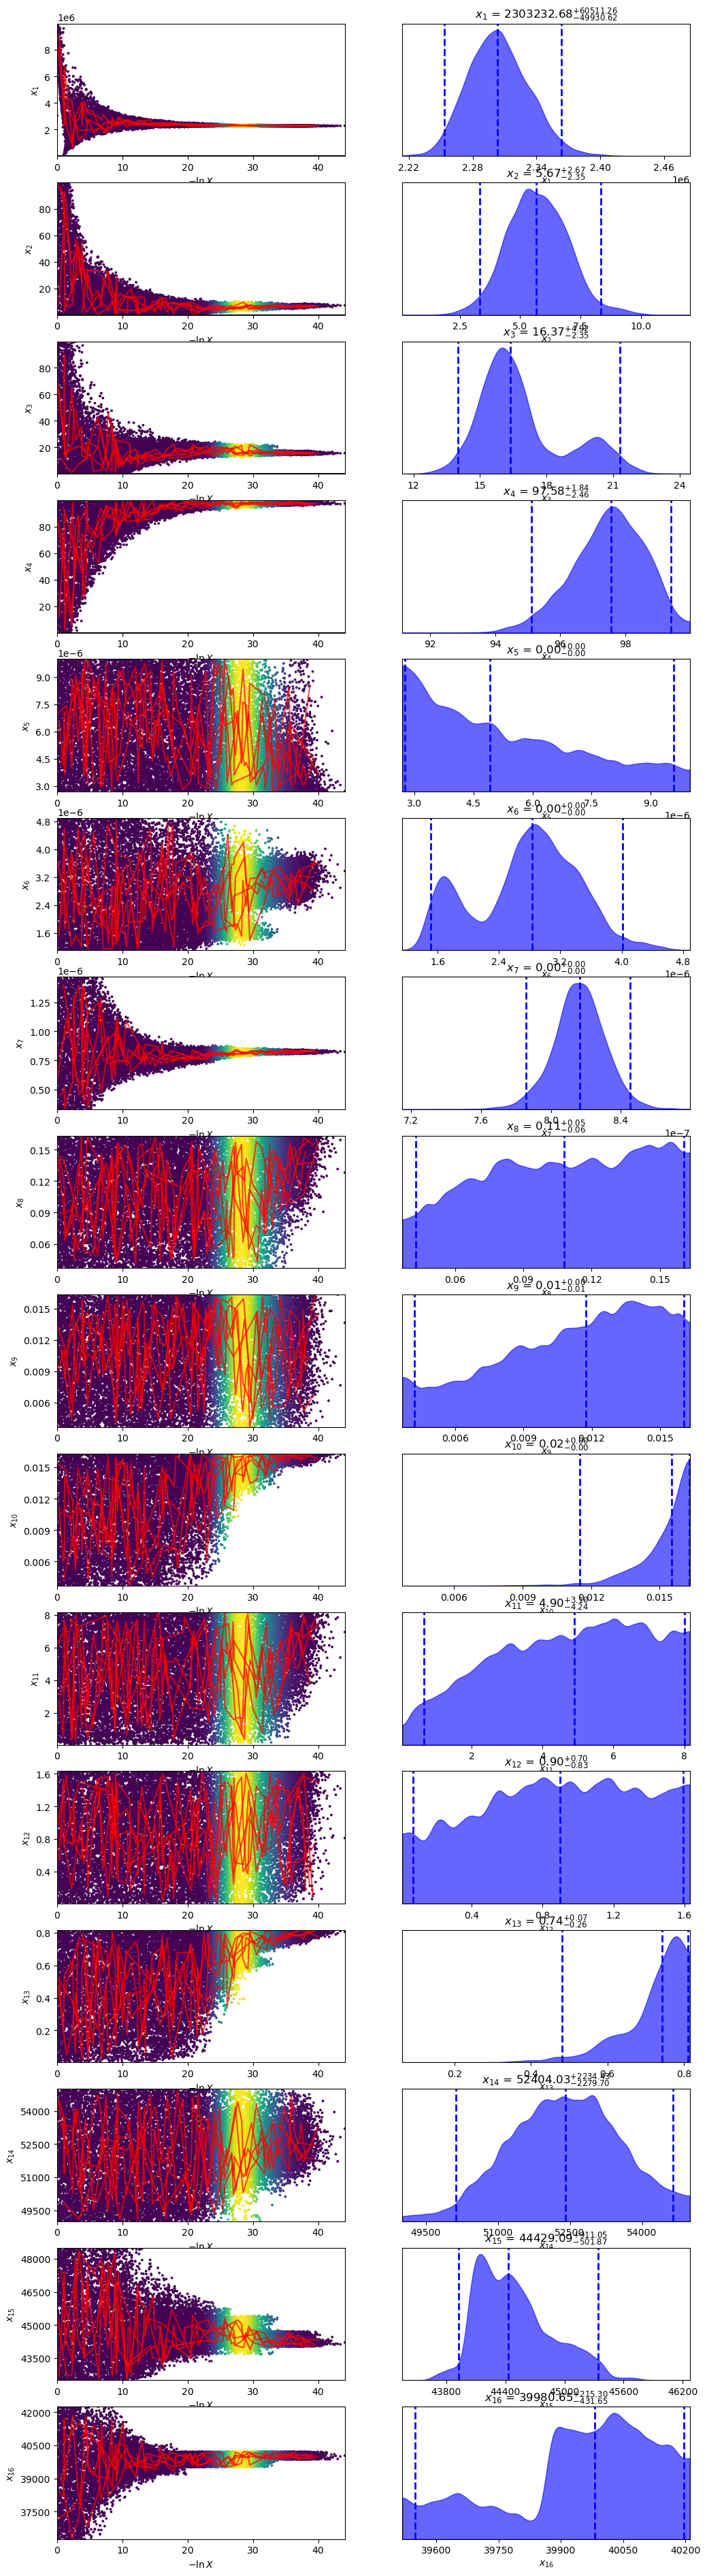

In [8]:
fig, axes = dyplot.traceplot(results, truths=np.zeros(ndim),
                             truth_color='black', show_titles=True,
                             trace_cmap='viridis', connect=True,
                             connect_highlight=range(5))

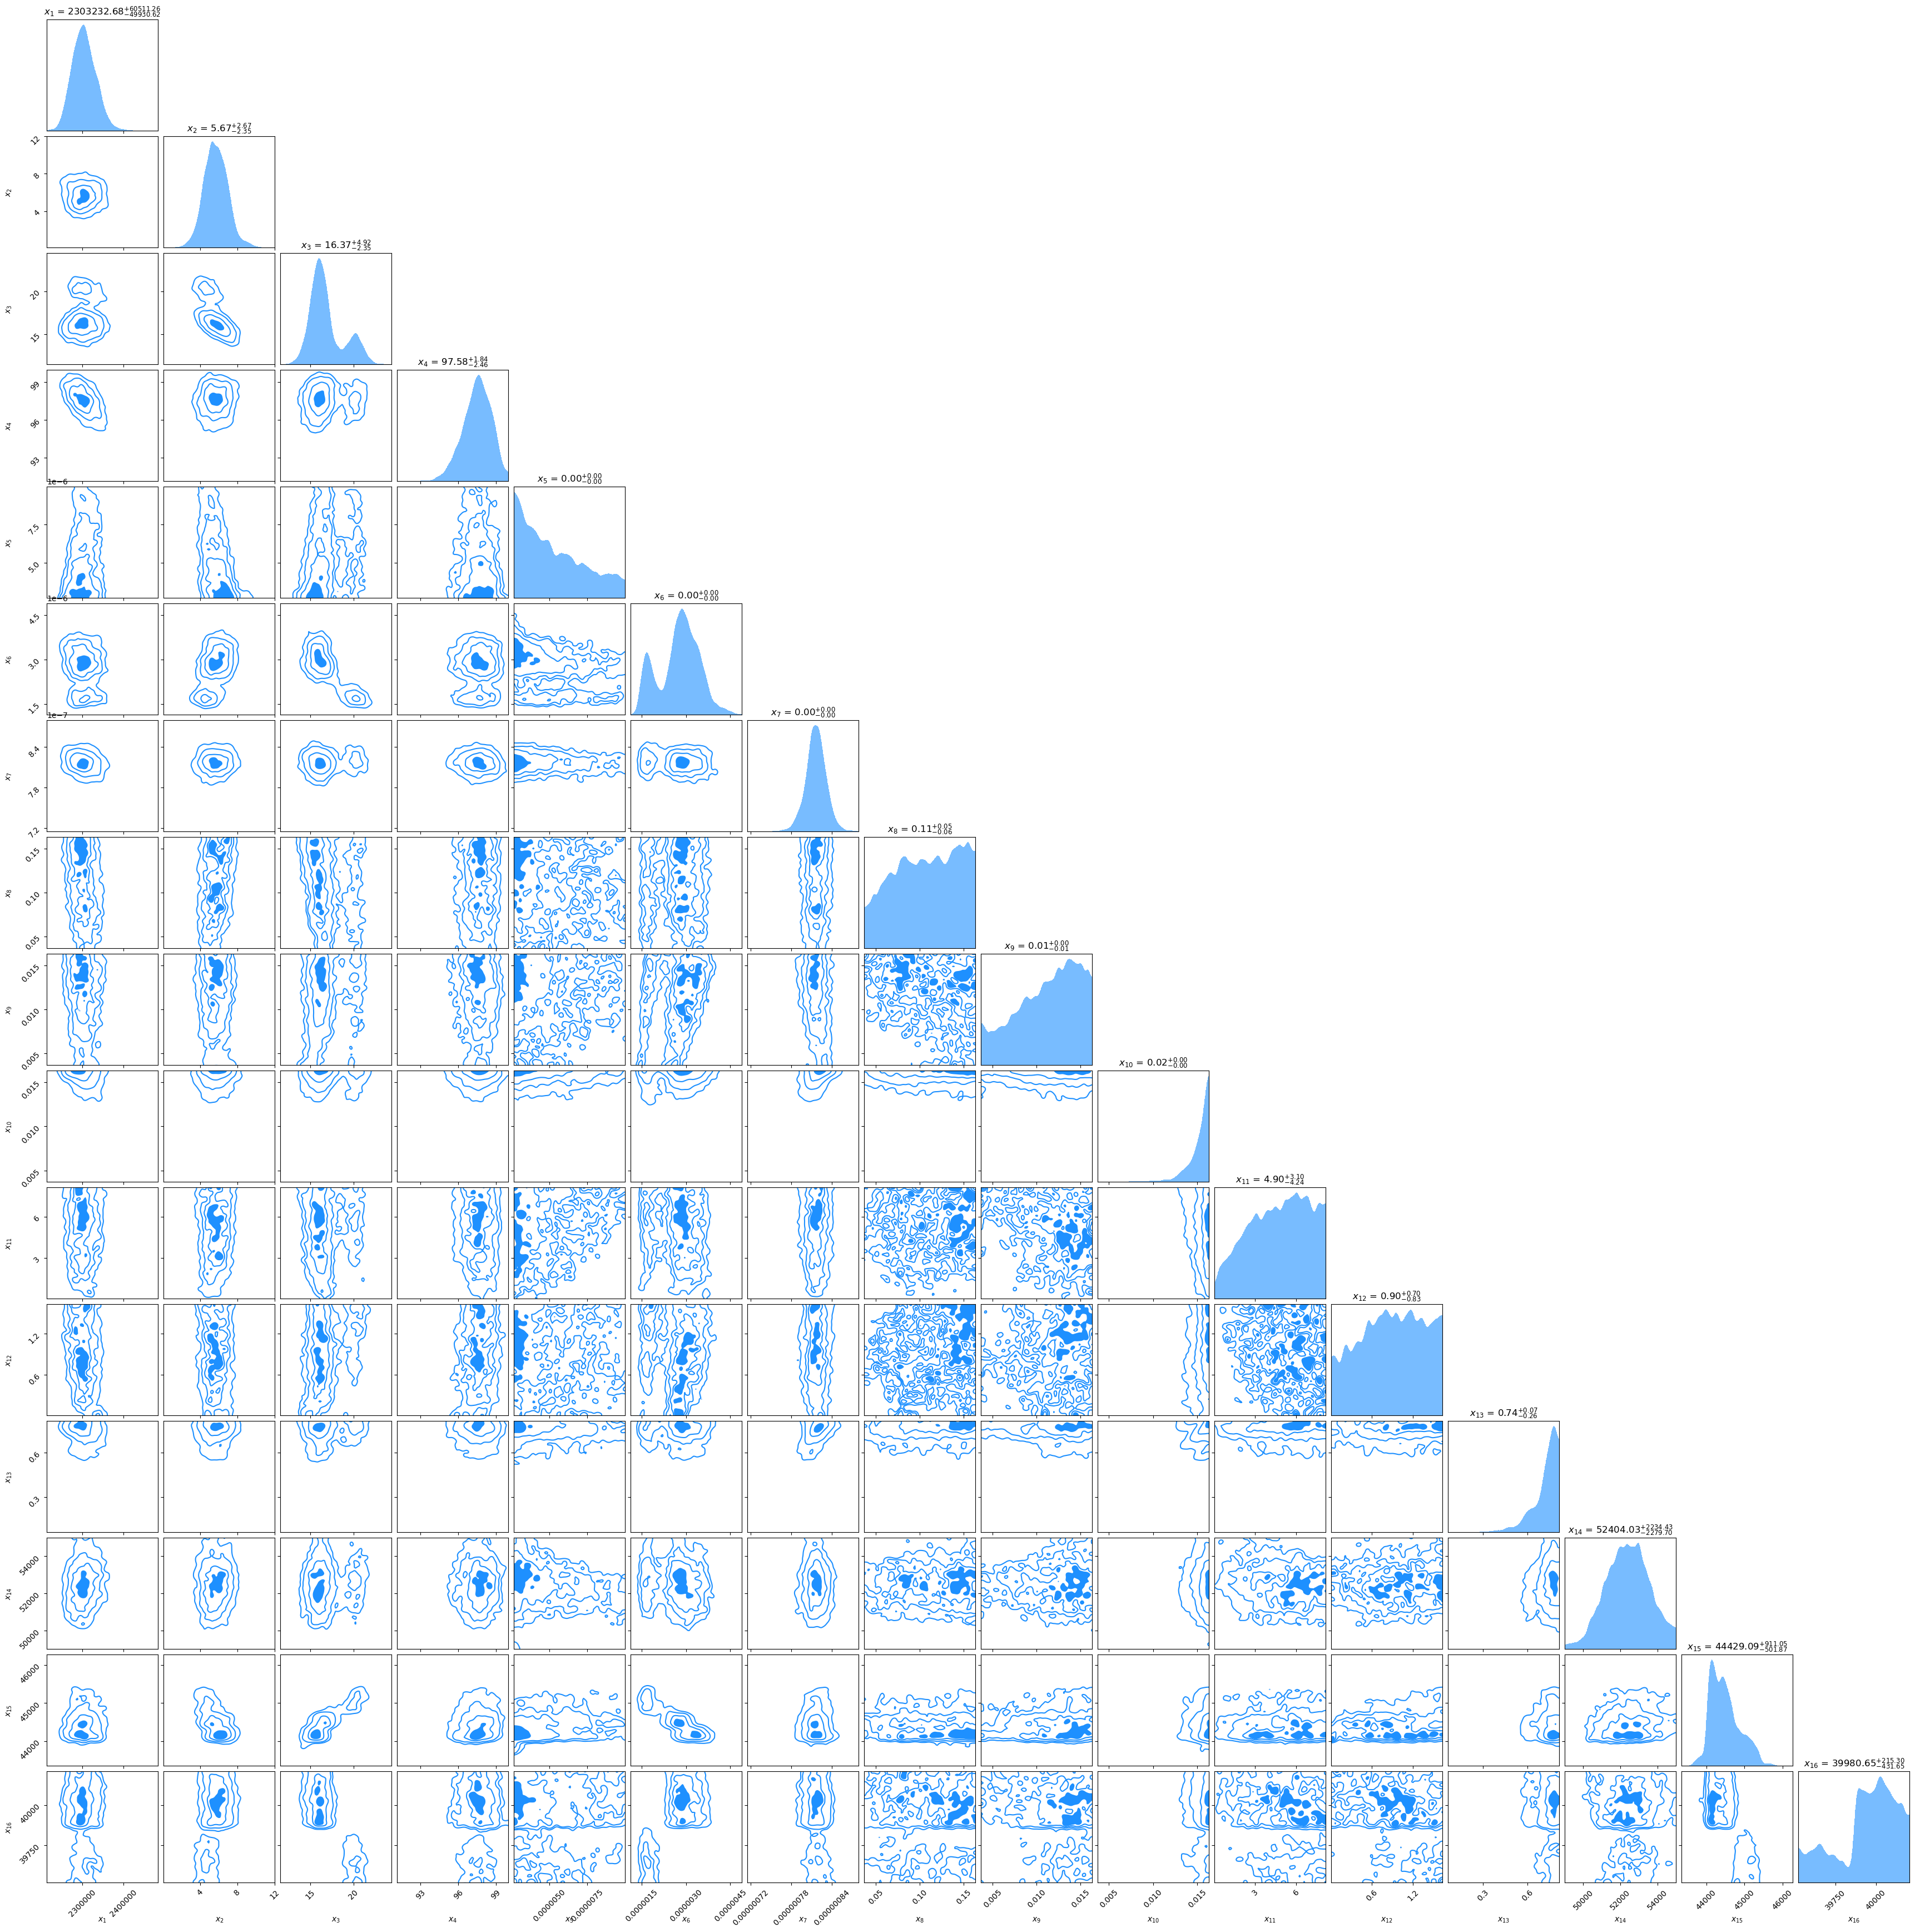

In [9]:
fg, ax = dyplot.cornerplot(results, color='dodgerblue', truths=np.zeros(ndim),
                           truth_color='black', show_titles=True,
                           quantiles=None, max_n_ticks=3)

In [10]:
print(dsampler.cite)

Code and Methods:
Speagle (2020): ui.adsabs.harvard.edu/abs/2020MNRAS.493.3132S
Koposov et al. (2023): doi.org/10.5281/zenodo.3348367

Nested Sampling:
Skilling (2004): ui.adsabs.harvard.edu/abs/2004AIPC..735..395S
Skilling (2006): projecteuclid.org/euclid.ba/1340370944
Dynamic Nested Sampling:
Higson et al. (2019): doi.org/10.1007/s11222-018-9844-0

Bounding Method:
Feroz, Hobson & Bridges (2009): ui.adsabs.harvard.edu/abs/2009MNRAS.398.1601F

Sampling Method:
Skilling (2006): projecteuclid.org/euclid.ba/1340370944

